In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200604_h3k9me3'

In [3]:
file=f'{bigDir}\\cellinfo_200604v6_10percent.csv'

In [4]:
data=pd.read_csv(file)

# data visualizations for 10% - 200604

In [5]:
data=data.drop(columns=['Unnamed: 0'])

In [6]:
data.head()

,file,original_name,movie,last frame movie position x,last frame movie position y,ab1 (Heterochromatin),ab1 ch,ab2 (MCM),ab2 ch,DAPI ch,...,temp,nuc_DAPI_total,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu
0,20200604_cell_00.ciz,200604_09_15_63X.czi,200604xy09,325.986,135.825,H3K9Me3,1,MCM2,2,3,...,0.100020,2.697250e+09,822467048.0,1.874783e+09,628945846.0,454611114.0,174334732.0,2.068304e+09,367855934.0,1.700448e+09
1,20200604_cell_01.ciz,200604_09_46_63X.czi,200604xy09,1103.256,483.760,H3K9Me3,1,MCM2,2,3,...,0.100014,2.321032e+09,899578615.0,1.421453e+09,490617687.0,340295962.0,150321725.0,1.830414e+09,559282653.0,1.271131e+09
2,20200604_cell_02.ciz,200604_09_51_63X.czi,200604xy09,1865.490,559.814,H3K9Me3,1,MCM2,2,3,...,0.100013,2.570708e+09,959263344.0,1.611445e+09,556729653.0,365812625.0,190917028.0,2.013979e+09,593450719.0,1.420528e+09
3,20200604_cell_03.ciz,200604_09_53_63X.czi,200604xy09,601.353,583.042,H3K9Me3,1,MCM2,2,3,...,0.100003,2.176022e+09,779353206.0,1.396669e+09,459623544.0,333437537.0,126186007.0,1.716398e+09,445915669.0,1.270483e+09
4,20200604_cell_04.ciz,200604_09_58_63X.czi,200604xy09,1577.064,627.569,H3K9Me3,1,MCM2,2,3,...,0.100028,2.687250e+09,828964429.0,1.858286e+09,554604150.0,367070421.0,187533729.0,2.132646e+09,461894008.0,1.670752e+09


In [7]:
data['mol_age_mod']=data['molecular age ']
i=0
for i,myCell in data.iterrows():
    try:
        data.loc[i,'physical_age']=((int(data.loc[i,'physical age [min]'][:-3]) / 60) + 1)
    except:
        data.loc[i,'physical_age']=None
data.loc[((data.physical_age<2) & (data.category=='earlyG1')),'mol_age_mod']=np.min(data['molecular age '])

In [8]:
data.to_csv(file)

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


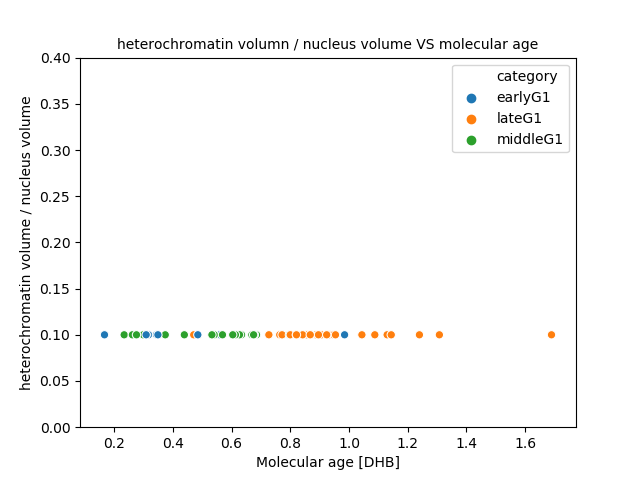

(0, 0.4)

In [12]:
%matplotlib notebook
data['temp']=data.nuc_vol_het/data.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age',fontsize=10)
plt.ylim(0,0.4)

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


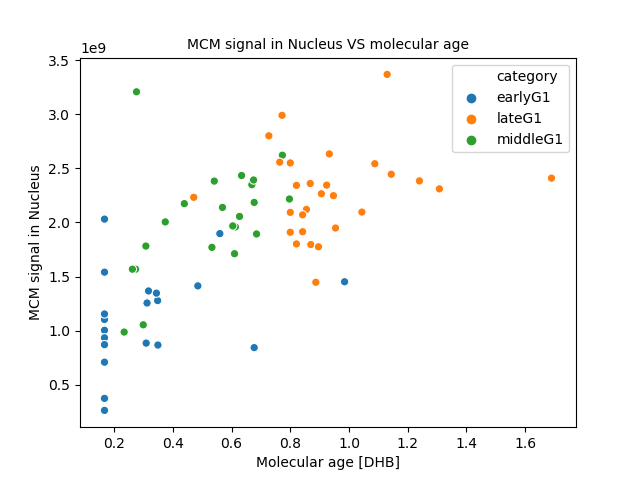

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [24]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age', fontsize=10)

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


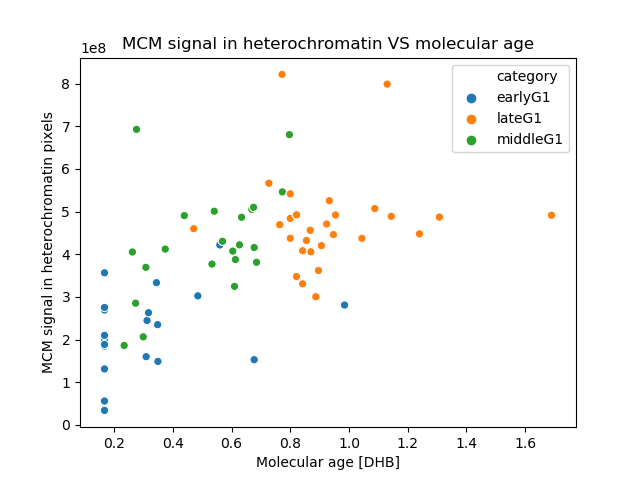

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [25]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age', fontsize=12)

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


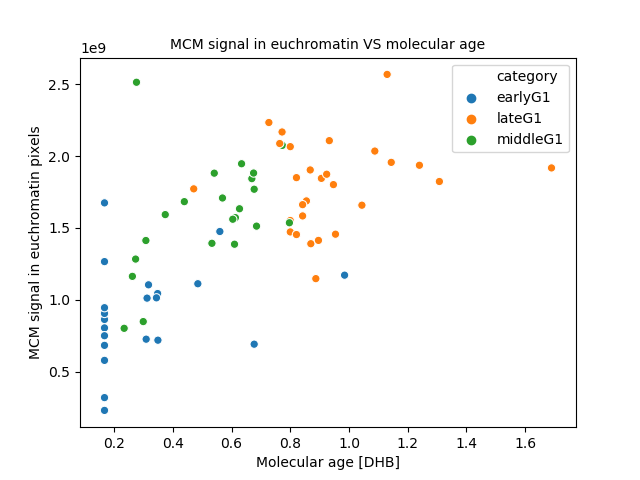

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [26]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age', fontsize=10)

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


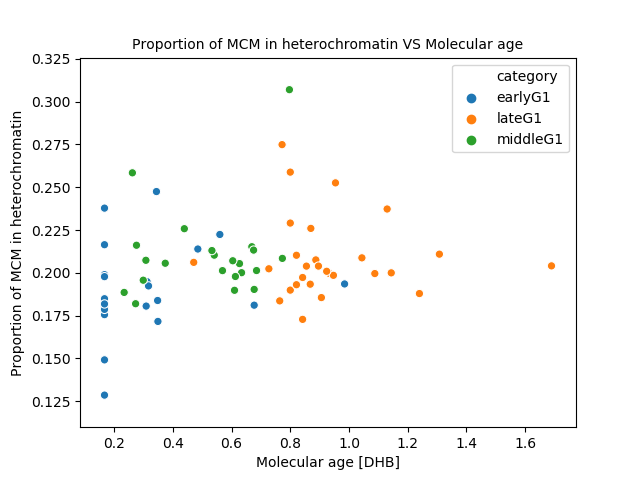

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [27]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het/data.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age', fontsize=10)

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


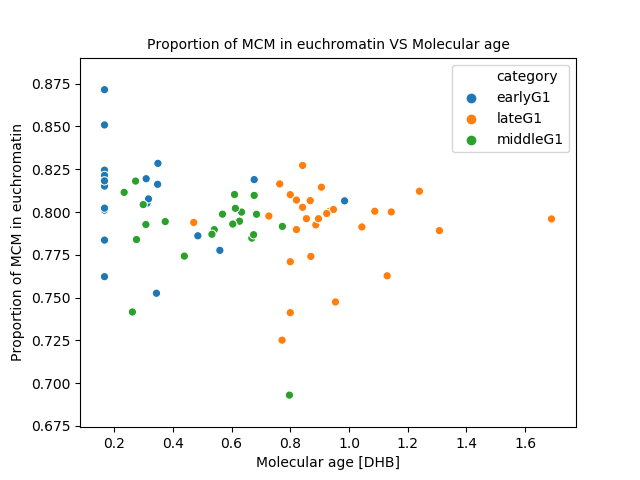

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [28]:
%matplotlib notebook
data['temp']=data.nuc_mcm_eu/data.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age', fontsize=10)

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


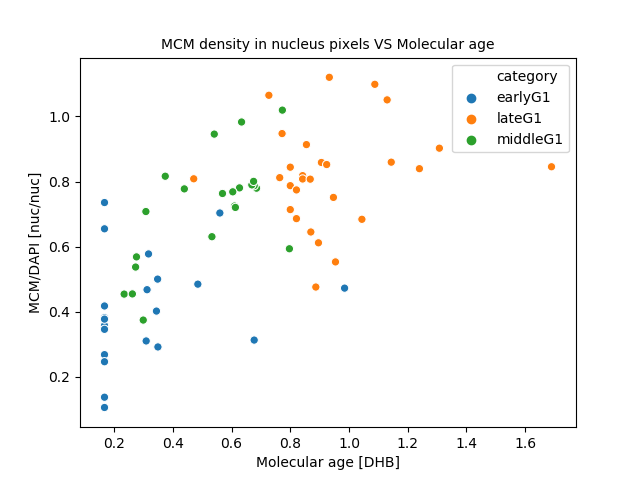

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [29]:
%matplotlib notebook
data['temp']=data.nuc_mcm_total/data.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age', fontsize=10)

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


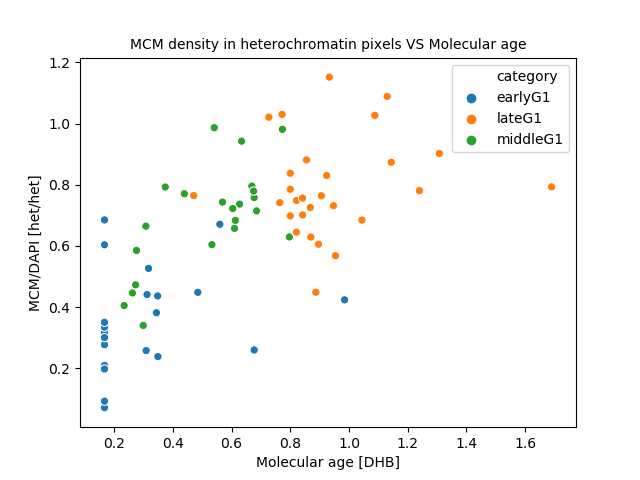

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [30]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het/data.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age', fontsize=10)

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


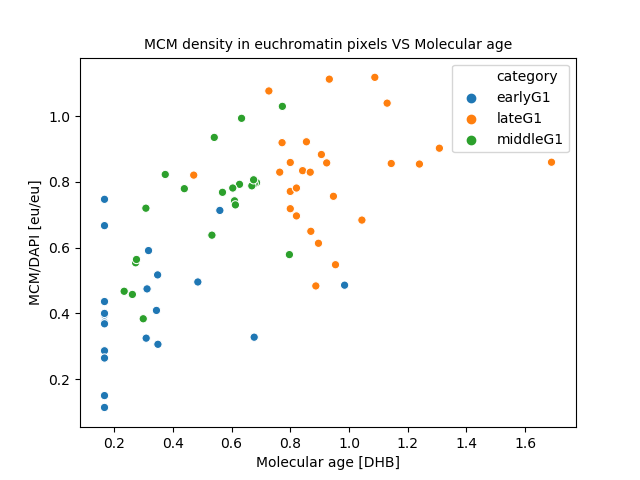

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [31]:
%matplotlib notebook
data['temp']=data.nuc_mcm_eu/data.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age', fontsize=10)

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


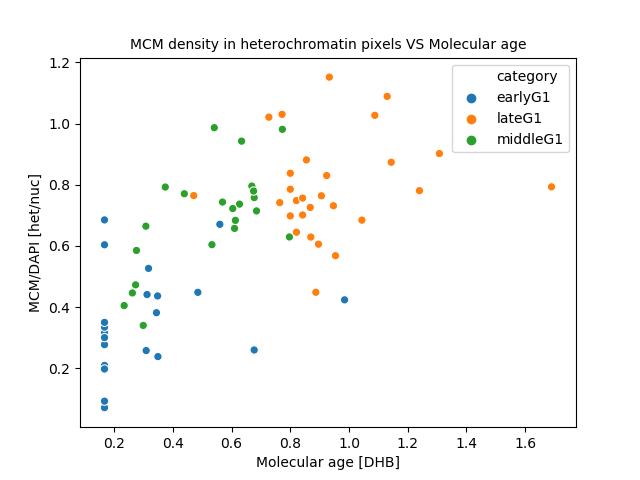

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [32]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het/data.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age', fontsize=10)

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


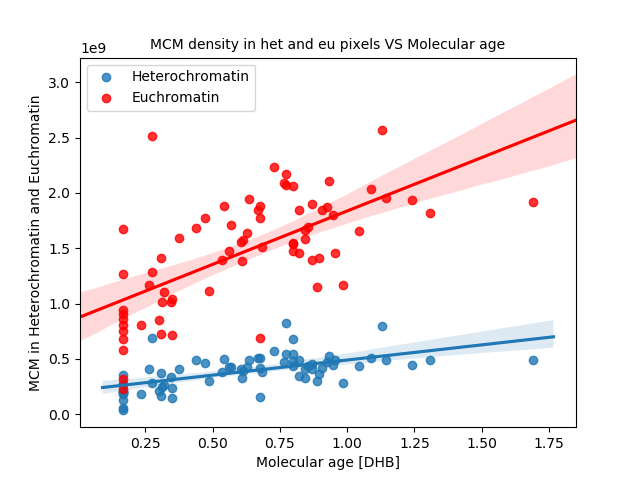

In [33]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het
data['temp2']=data.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=data.loc[(['G1' in x for x in data.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=data.loc[(['G1' in x for x in data.category]),:], 
           color="r", label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age', fontsize=10)
plt.legend(loc="upper left")



## 11.  mcm/dapi in heterochromatin/nucleus pixels vs molecular age

<IPython.core.display.Javascript object>


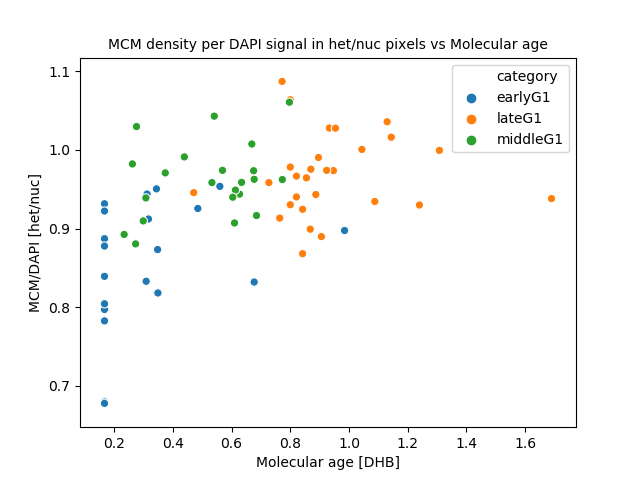

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [34]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

<IPython.core.display.Javascript object>


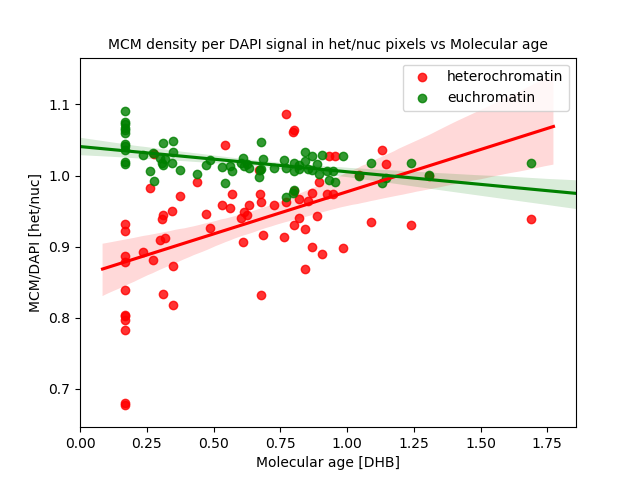

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [35]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_DAPI_eu)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

# data visualizations for 50% - 200604

In [58]:
file1=f'{bigDir}\\cellinfo_200604v6_50percent.csv'
data1=pd.read_csv(file1)

In [59]:
data1.category.unique()

array(['earlyG1', 'lateG1', 'middleG1', 'G2'], dtype=object)

In [63]:
data1.loc[(['G1' in x for x in data1.category]),('category','mol_age_mod')]

,category,mol_age_mod
0,earlyG1,0.560
1,lateG1,0.855
2,middleG1,0.773
3,middleG1,0.234
4,earlyG1,0.312
...,...,...
72,lateG1,0.924
73,earlyG1,0.309
74,middleG1,0.604
75,earlyG1,0.387


In [62]:
data1['mol_age_mod']=data1['molecular age ']
i=0
for i,myCell in data1.iterrows():
    try:
        data1.loc[i,'physical_age']=((int(data1.loc[i,'physical age [min]'][:-3]) / 60) + 1)
    except:
        data1.loc[i,'physical_age']=None
data.loc[((data1.physical_age<2) & (data1.category=='earlyG1')),'mol_age_mod']=np.min(data1['molecular age '])

In [65]:
data1.to_csv(file1)

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


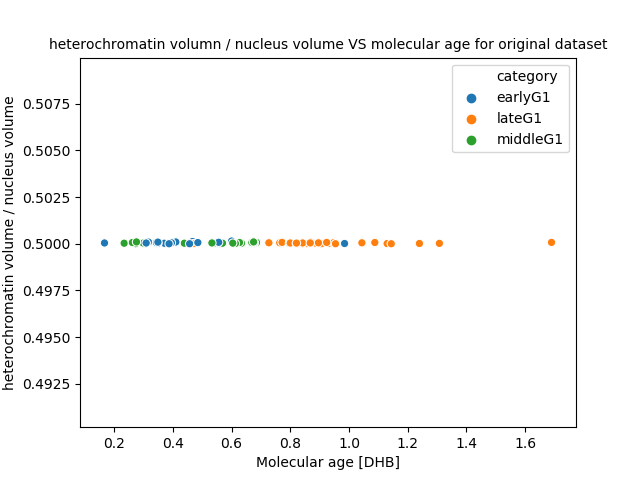

Text(0.5, 1.0, 'heterochromatin volumn / nucleus volume VS molecular age for original dataset')

In [68]:
%matplotlib notebook
data1['temp']=data1.nuc_vol_het/data1.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age for original dataset',fontsize=10)

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


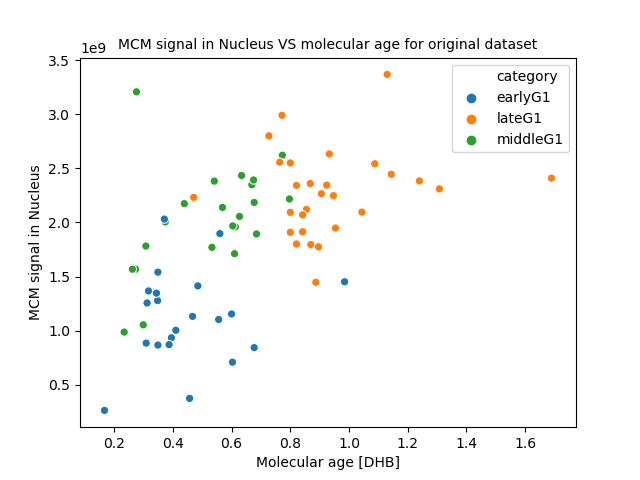

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age for original dataset')

In [69]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age for original dataset', fontsize=10)

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


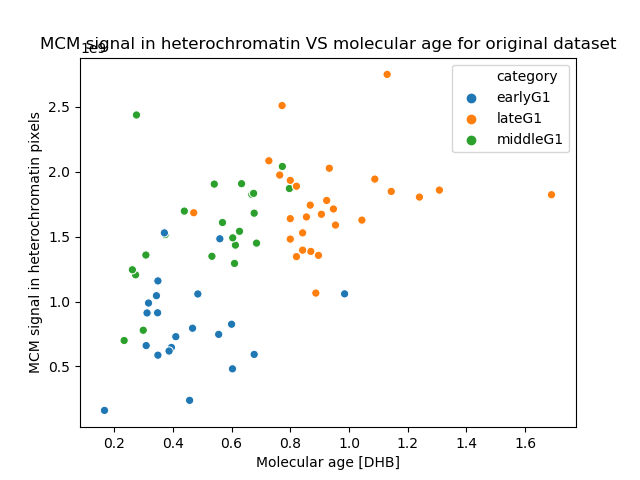

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age for original dataset')

In [70]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age for original dataset', fontsize=12)

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


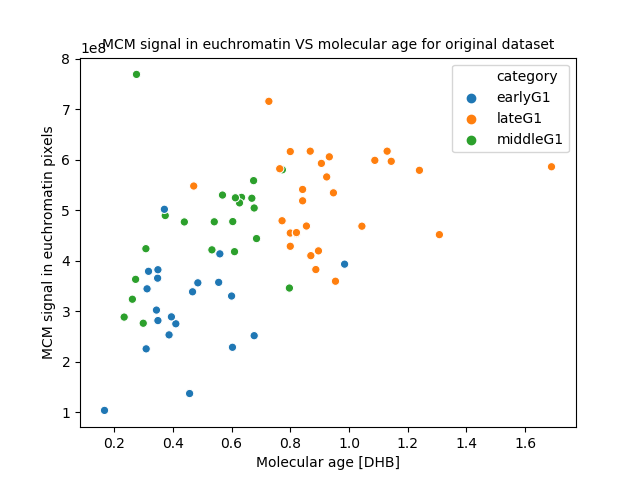

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age for original dataset')

In [71]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age for original dataset', fontsize=10)

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


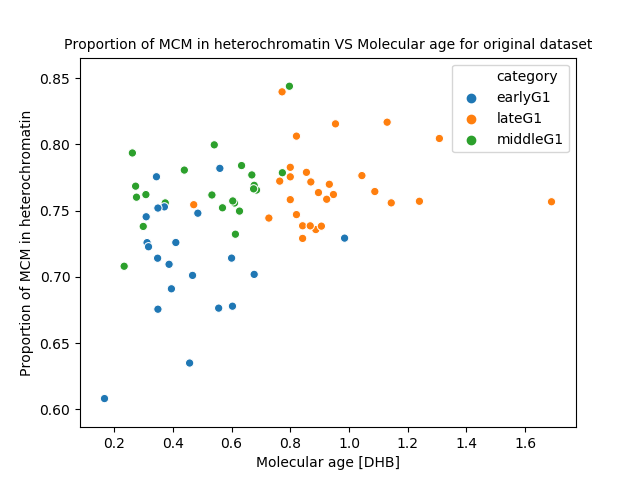

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age for original dataset')

In [73]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_het/data1.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age for original dataset', fontsize=10)


## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


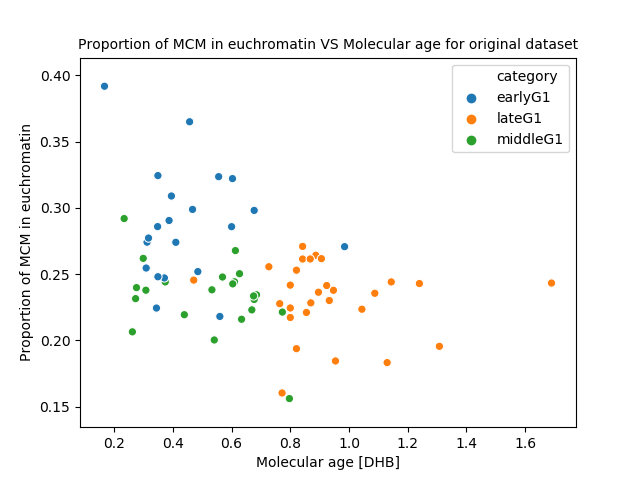

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age for original dataset')

In [74]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_eu/data1.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age for original dataset', fontsize=10)


## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


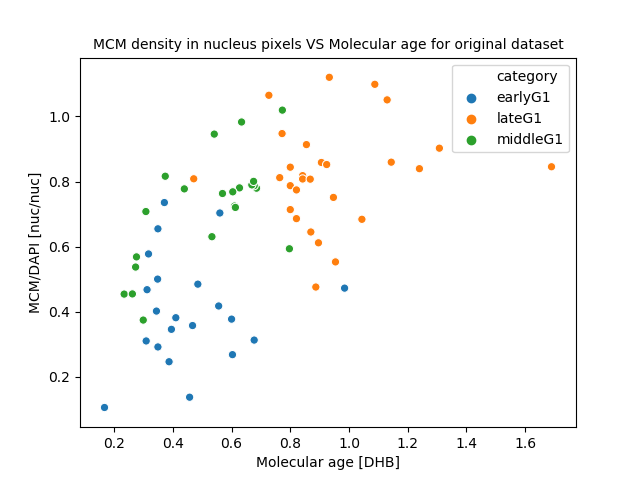

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age for original dataset')

In [75]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_total/data1.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age for original dataset', fontsize=10)

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


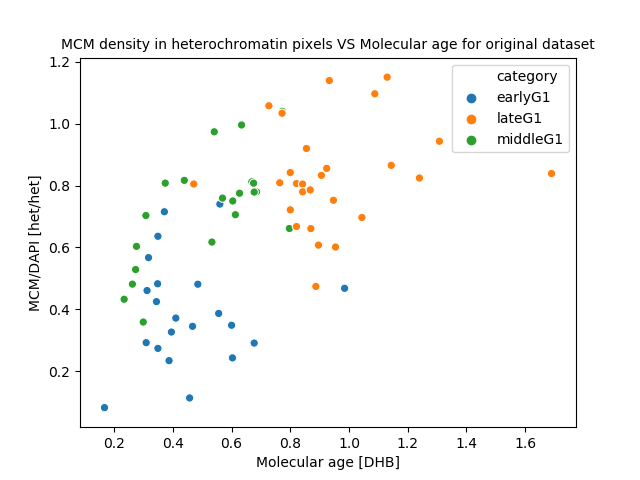

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for original dataset')

In [76]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_het/data1.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for original dataset', fontsize=10)

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


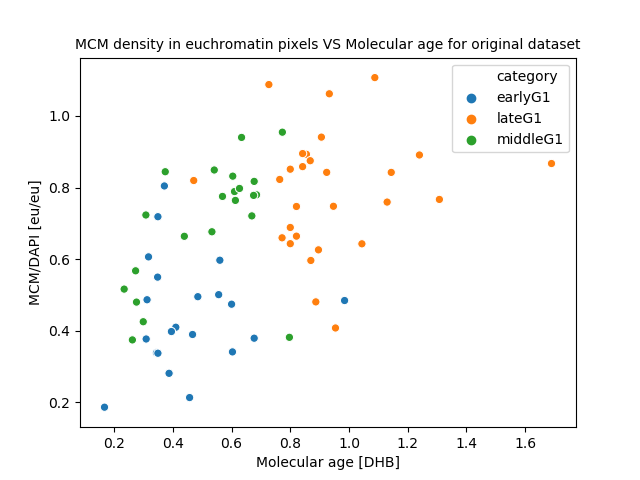

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age for original dataset')

In [77]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_eu/data1.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age for original dataset', fontsize=10)

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


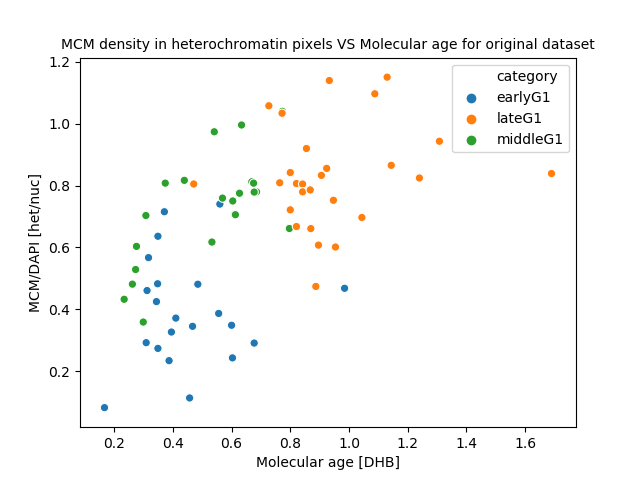

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for original dataset')

In [78]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_het/data1.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for original dataset', fontsize=10)

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


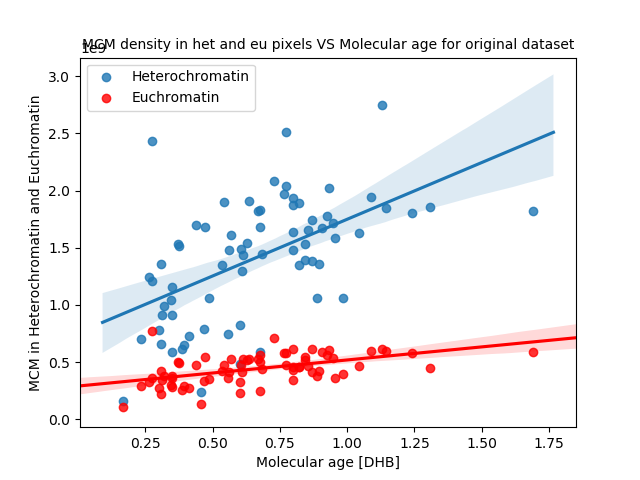

In [79]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_het
data1['temp2']=data1.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=data1.loc[(['G1' in x for x in data1.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=data1.loc[(['G1' in x for x in data1.category]),:], 
           color="r", label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age for original dataset', fontsize=10)
plt.legend(loc="upper left")



## 11.  mcm/dapi in heterochromatin/nucleus pixels vs molecular age

<IPython.core.display.Javascript object>


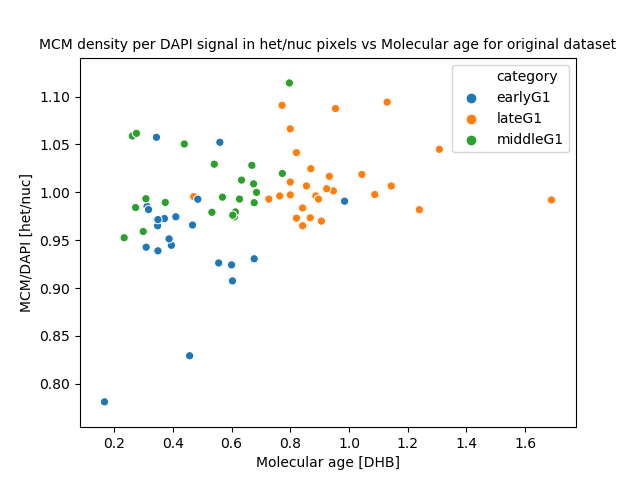

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age for original dataset')

In [80]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_DAPI_het)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age for original dataset', fontsize=10)

Plot #11 for H3K9Me3 groups show different slopes. The following plot will plot these two plots in one figutre.